In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cvxpy as cp

In [2]:
x1il = [-3,-2.5,3,-1.5,0,1]
x2il = [9,6.25,9,2.25,0,1]
yil = [1,1,1,-1,-1,-1]
x1i = np.array(x1il)
x2i = np.array(x2il)
yi = np.array(yil)
x = np.concatenate((x1i.reshape((x1i.shape[0],1)),x2i.reshape((x2i.shape[0],1))),axis=1)
y = yi
dataset = pd.DataFrame(list(zip(x1il, x2il,yil)), columns =['Attribute_1', 'Attribute_2', 'Label'])
dataset.head()

,Attribute_1,Attribute_2,Label
0,-3.0,9.00,1
1,-2.5,6.25,1
2,3.0,9.00,1
3,-1.5,2.25,-1
4,0.0,0.00,-1


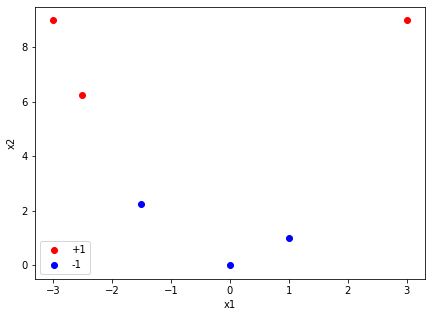

In [3]:
label1 = (y==1)
label2 = (y==-1)
plt.scatter(x[label1,0],x[label1,1],color='red')
plt.scatter(x[label2,0],x[label2,1],color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(('+1','-1'))
fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()

In [4]:
m = x.shape[0]
d = x.shape[1]

w = cp.Variable(d)
b = cp.Variable()

obj = cp.Minimize((0.5*cp.norm(w,2)))

constraints = [(y[i]*(w.T*x[i] + b) >= 1) for i in range(m)]

prob = cp.Problem(obj,constraints)
prob.solve()

0.24253562510612459

In [5]:
def plotClusters(x,y,w,b):
    # Takes in a set of datapoints x and y for two clusters,
    #  the hyperplane separating them in the form a'x -b = 0,
    #  and a slab half-width t
    d1_min = np.min(x[:,0])
    d1_max = np.max(x[:,0])
    # Line form: (-a[0] * x - b ) / a[1]
    d2_atD1min = (-w[0]*d1_min - b ) / w[1]
    d2_atD1max = (-w[0]*d1_max - b ) / w[1]

    sup_up_atD1min = (-w[0]*d1_min - b + 1 ) / w[1]
    sup_up_atD1max = (-w[0]*d1_max - b + 1 ) / w[1]
    sup_dn_atD1min = (-w[0]*d1_min - b - 1 ) / w[1]
    sup_dn_atD1max = (-w[0]*d1_max - b - 1 ) / w[1]

    # Plot the clusters!
    label1 = (y==1)
    label2 = (y==-1)
    plt.scatter(x[label1,0],x[label1,1],color='red')
    plt.scatter(x[label2,0],x[label2,1],color='blue')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(('+1','-1'))
    plt.plot([d1_min,d1_max],[d2_atD1min,d2_atD1max],color='black')
    plt.plot([d1_min,d1_max],[sup_up_atD1min,sup_up_atD1max],'--',color='gray')
    plt.plot([d1_min,d1_max],[sup_dn_atD1min,sup_dn_atD1max],'--',color='gray')
    fig = plt.gcf()
    fig.set_size_inches(7, 5)
    plt.show()

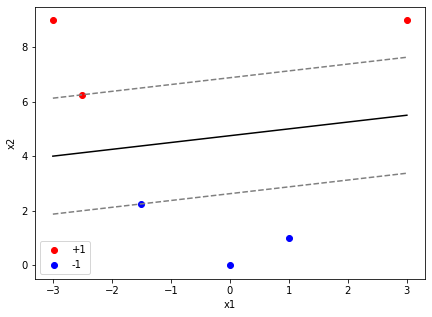

In [6]:
plotClusters(x,y,w.value,b.value)

In [10]:
print(1/LA.norm(w.value))

2.0615528123103815


In [9]:
print(w.value)

[-0.11764682  0.4705883 ]


In [11]:
print(b.value)

-2.235293893963327


In [12]:
dataset1 = pd.read_csv(filepath_or_buffer='Data.csv',header=None,names=['Attribute_1','Attribute_2','Label'])

In [ ]:
label1 = (y==1)
label2 = (y==-1)
plt.scatter(x[label1,0],x[label1,1],color='red')
plt.scatter(x[label2,0],x[label2,1],color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(('+1','-1'))
fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()